In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Data Set Generation

In [2]:
np.random.seed(314)

x = np.arange(0, 8 * np.pi, 0.001)
e = np.random.randn(len(x) * 2)
y = np.sin(x) + e[0:len(x)]
y_test = np.sin(x) + e[len(x):]

len(x)

25133

Above is not a proper way to sample from the given distribution, instead one should sample randomly from the generated distribution:

In [3]:
train_idx = np.random.choice(np.arange(0, len(x)), 1000) 
train_x = np.array([x[idx] for idx in train_idx])
train_y = np.array([y[idx] for idx in train_idx])

test_idx = np.random.choice(np.arange(0, len(x)), 1000) 
test_x = np.array([x[idx] for idx in test_idx])
test_y = np.array([y[idx] for idx in test_idx])

train_x.shape

(1000,)

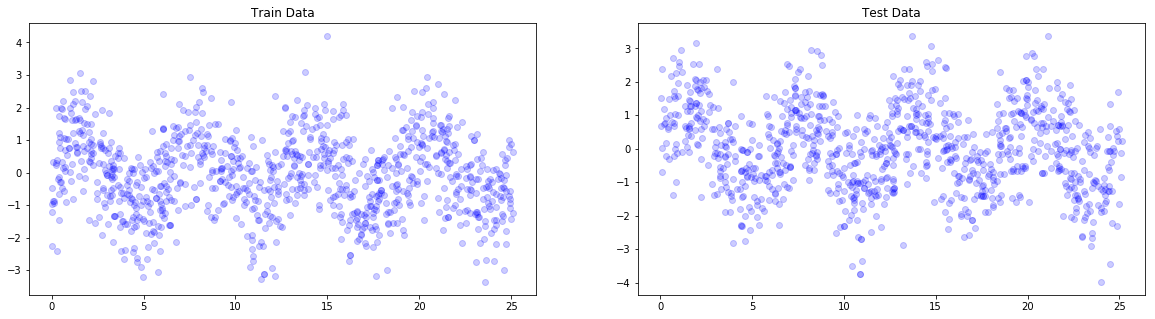

In [4]:
f, ax = plt.subplots(1, 2, figsize=(20, 5))
ax[0].scatter(train_x, train_y, color='b', marker='o', alpha=0.2)
ax[0].set_title('Train Data')
ax[1].scatter(test_x,  test_y,  color='b', marker='o', alpha=0.2)
ax[1].set_title('Test Data')
plt.show()

# Polynomial Regression

Simple one-dimensional polynomial regression with given degree p

In [5]:
def simple_one_dim_poly_reg(x, y, p):
    X = np.transpose([x**i for i in np.arange(0, p + 1)])
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    
    return (beta, X)

<h3> Select optimal degree of freedom</h3>

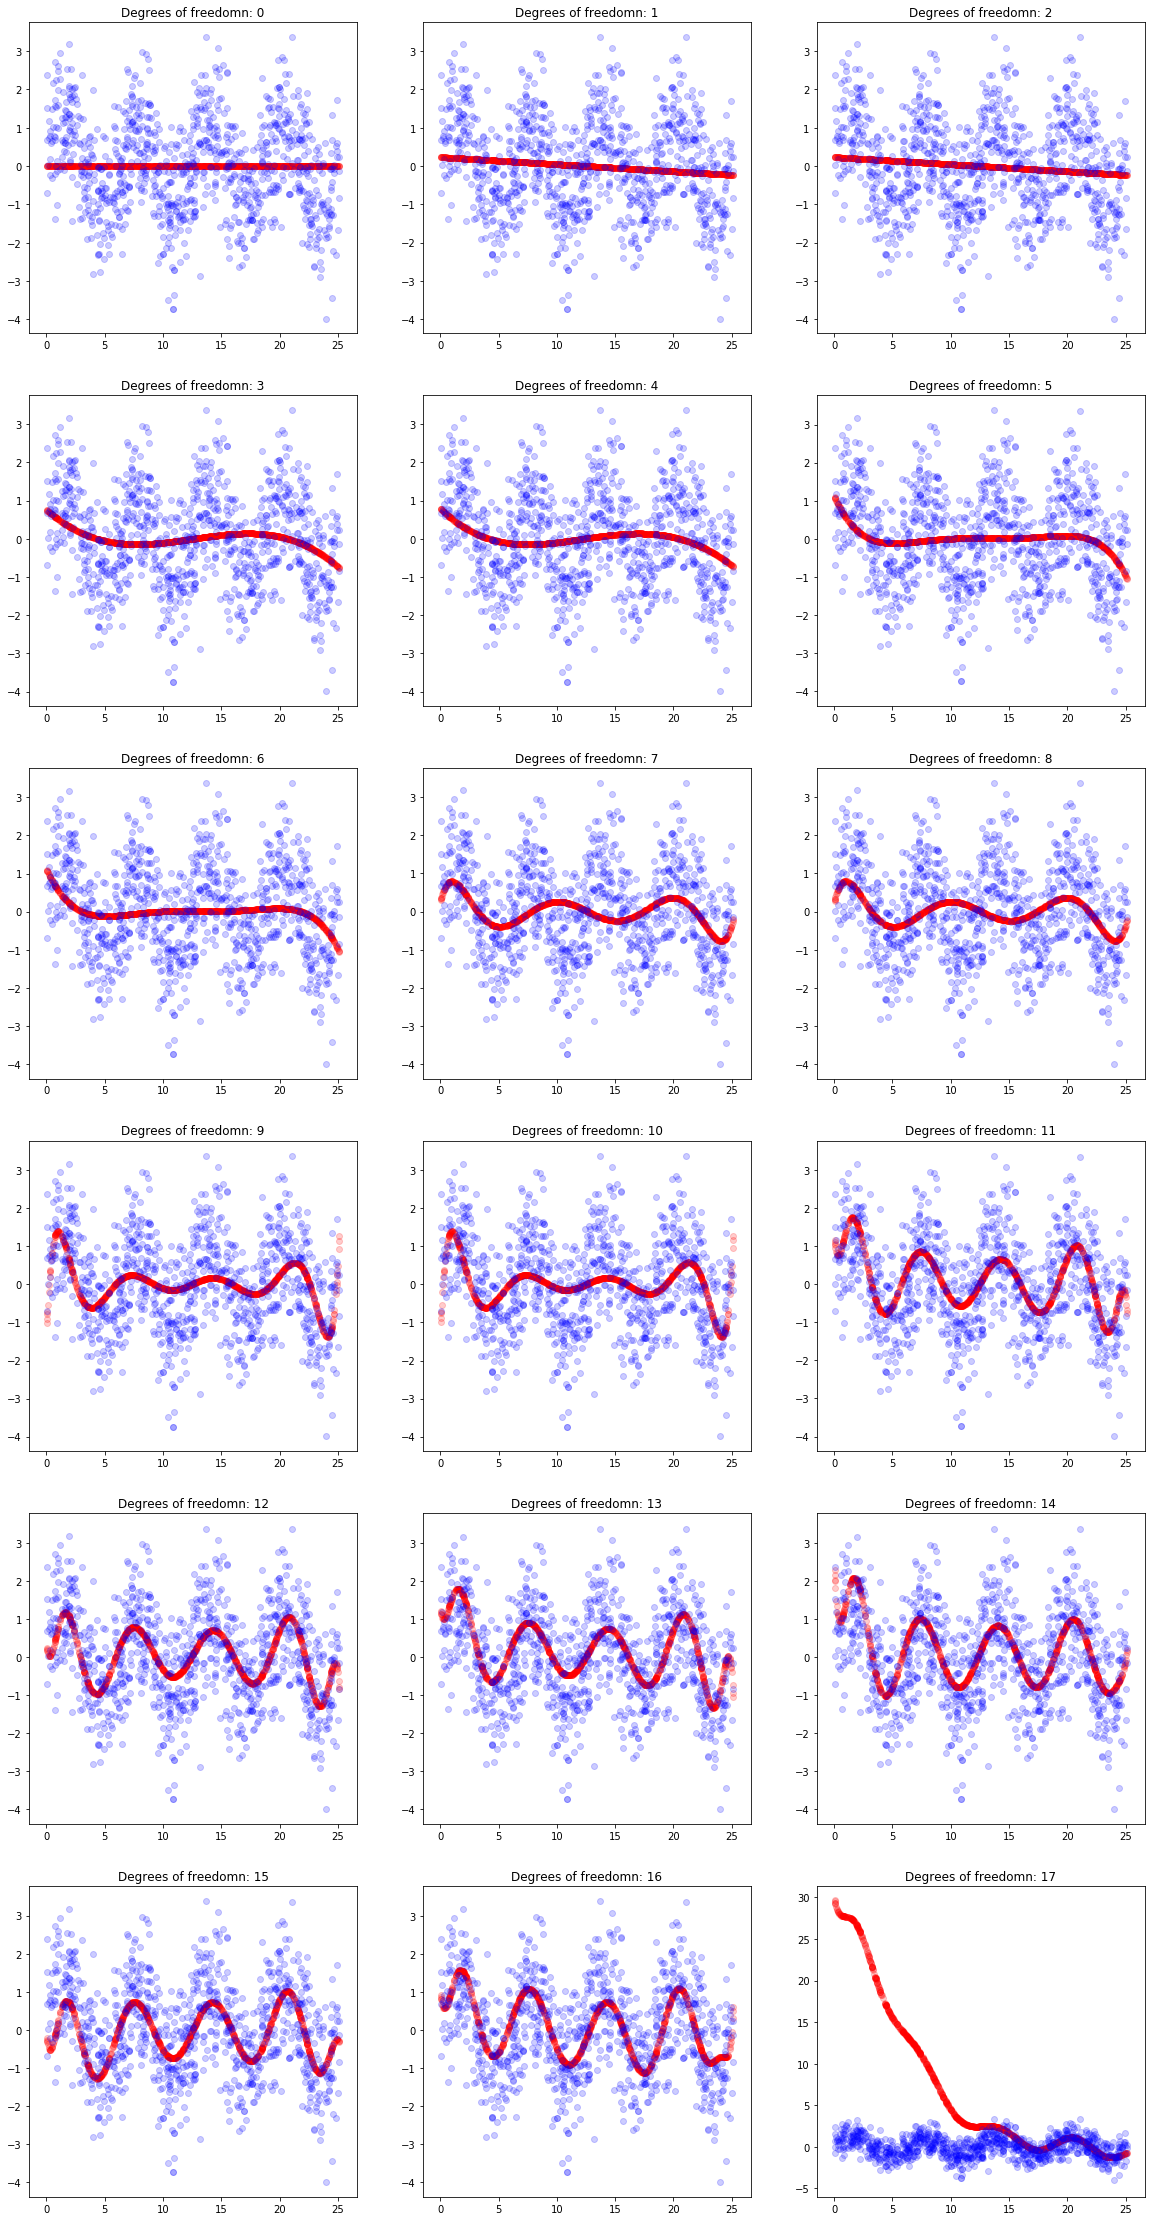

In [6]:
Y_hats = []
betas = []
RSSs = []

fig, axes = plt.subplots(nrows=6, ncols=3, figsize=(20, 40))

for i in range(0, 18):
    beta, _ = simple_one_dim_poly_reg(x, y, i)
    X = np.transpose([test_x**p for p in np.arange(0, i + 1)])
    Y_hat = X.dot(beta)
    RSS = sum((test_y - Y_hat)**2)
    
    Y_hats.append(Y_hat)
    betas.append(beta)
    RSSs.append(RSS)
    
    pltrow = int(i / 3)
    pltcol = i % 3
    axes[pltrow, pltcol].scatter(test_x, Y_hat,  color='r', marker='o', alpha=0.2)
    axes[pltrow, pltcol].scatter(test_x, test_y, color='b', marker='o', alpha=0.2)
    axes[pltrow, pltcol].set_title('Degrees of freedomn: {:d}'.format(i))
    
plt.show()

In [7]:
print('Optimal degree of polynomial regression: {:d}'.format(np.argmin(RSSs)))

Optimal degree of polynomial regression: 16


<h3>Plot estimate over original data generation function </h3>

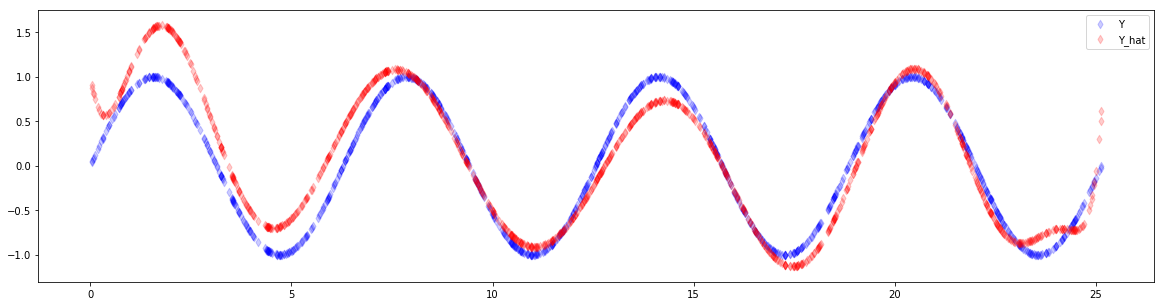

In [8]:
plt.figure(figsize=(20, 5))
plt.scatter(test_x, np.sin(test_x),          color='b', marker='o', alpha=0.2, label='Y')
plt.scatter(test_x, Y_hats[np.argmin(RSSs)], color='r', marker='o', alpha=0.2, label='Y_hat')
plt.legend()
plt.show()

Since we didn't understand the lagrange optimization, we used Residual Sum of Squares in order to select the optimal degree of freedom. The plot over the data generation function shows, that this worksquite well.

# Kernel Regression

In [9]:
def kernel_transformation(X, lamb):
    boo = np.array(X)
    n = len(boo)
    
    #clone the X column n times
    expanded = np.transpose(np.reshape(np.array([np.reshape(boo, [n, 1])] * n), [n, n]))
    
    #duplicate each value of X n times and align them to columns
    subtract = np.array([boo] * n)
    
    #plug in formular
    transformed = np.exp(-1 * np.square(np.abs(expanded - subtract)) / lamb)
    
    return transformed

In [10]:
def kernel_reg(x, y, lamb):
    X = kernel_transformation(x, lamb)
    beta = np.linalg.inv(np.transpose(X).dot(X)).dot(np.transpose(X).dot(y))
    Y_hat = X.dot(beta)
    RSS = sum((y - Y_hat)**2)
    
    return (Y_hat, beta, RSS)

In [11]:
Y_hats2 = []
betas2  = []
RSSs2   = []
lambs2  = []

for lamb in range(2, 100):
    beta = 0
    
    try:
        beta = kernel_reg(train_x, train_y, lamb)[1]
    except np.linalg.LinAlgError:
        print('Singular matrix for lamda = {:d}'.format(lamb))
        continue
    
    X = kernel_transformation(test_x, lamb)
    Y_hat = X.dot(beta)
    RSS = sum((test_y - Y_hat)**2)
    
    Y_hats2.append(Y_hat)
    betas2.append(beta)
    RSSs2.append(RSS)
    lambs2.append(lamb)

Singular matrix for lamda = 2
Singular matrix for lamda = 5
Singular matrix for lamda = 8
Singular matrix for lamda = 9
Singular matrix for lamda = 11
Singular matrix for lamda = 14
Singular matrix for lamda = 15
Singular matrix for lamda = 16
Singular matrix for lamda = 17
Singular matrix for lamda = 18
Singular matrix for lamda = 26
Singular matrix for lamda = 27
Singular matrix for lamda = 30
Singular matrix for lamda = 43
Singular matrix for lamda = 45
Singular matrix for lamda = 46
Singular matrix for lamda = 47
Singular matrix for lamda = 50
Singular matrix for lamda = 51
Singular matrix for lamda = 56
Singular matrix for lamda = 59
Singular matrix for lamda = 62
Singular matrix for lamda = 64
Singular matrix for lamda = 66
Singular matrix for lamda = 69
Singular matrix for lamda = 72
Singular matrix for lamda = 73
Singular matrix for lamda = 75
Singular matrix for lamda = 76
Singular matrix for lamda = 77
Singular matrix for lamda = 79
Singular matrix for lamda = 85
Singular mat

How to deal with those singular matrices? One possible solution could be regularization, but we haven't implemented this.

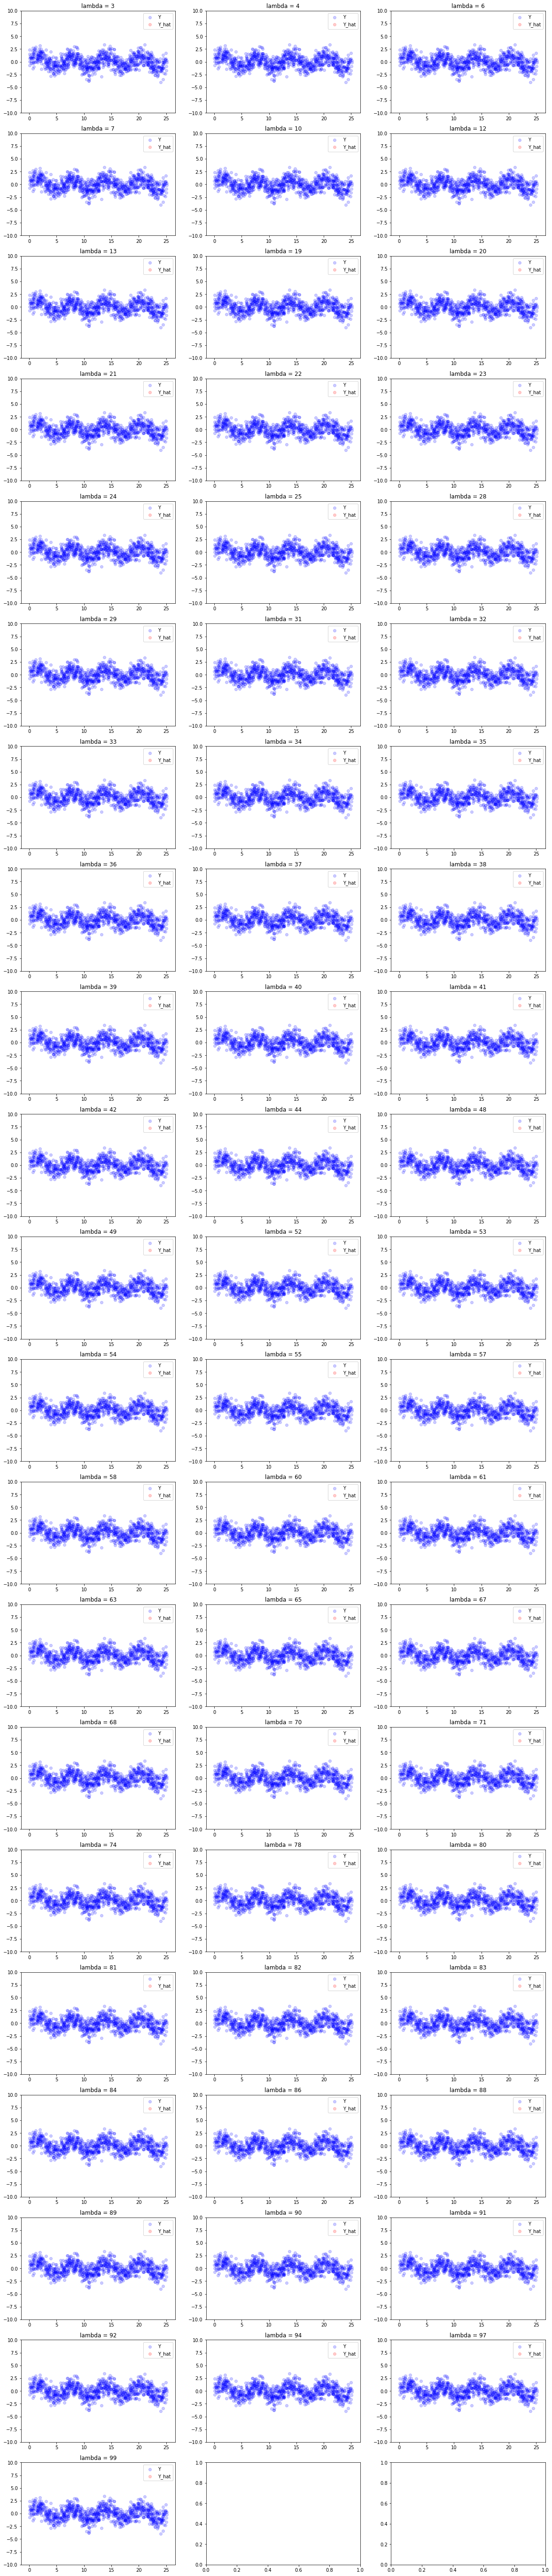

In [12]:
cols = 3
rows = int(np.ceil(len(Y_hats2) / cols))

fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 100))

for i in range(0, len(Y_hats2)):
    pltrow = int(i / cols)
    pltcol = i % cols
    
    axes[pltrow, pltcol].scatter(test_x, test_y,     color='b', marker='o', alpha=0.2, label='Y')
    axes[pltrow, pltcol].scatter(test_x, Y_hats2[i], color='r', marker='o', alpha=0.2, label='Y_hat')
    axes[pltrow, pltcol].set_ylim(-10, 10)
    axes[pltrow, pltcol].set_title('lambda = {:d}'.format(lambs2[i]))
    axes[pltrow, pltcol].legend()

The graphs show that there's some problem with the calculation. When scaling the graphs to properly display the test data, you can't actualy see the predicted datapoints.

In [13]:
np.argmin(RSSs2)

47

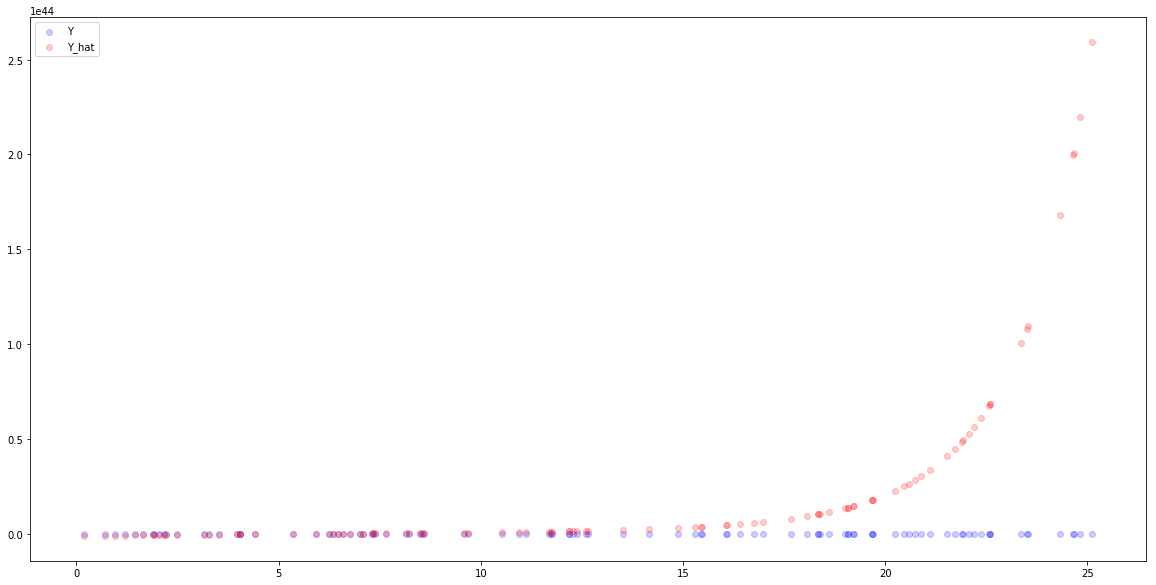

In [14]:
plt.figure(figsize=(20,10))
Y_hat2 = Y_hats2[np.argmin(RSSs2)][0::10]
X = test_x[0::10]
Y = test_y[0::10]

plt.scatter(X, Y,      color='b', marker='o', alpha=0.2, label='Y')
plt.scatter(X, Y_hat2, color='r', marker='o', alpha=0.2, label='Y_hat')
plt.legend()

plt.show()